<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_2_2_%D0%9D%D0%B5%D0%B7%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%B0%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%86%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому ДЗ ми потренуємось розв'язувати задачу багатокласової класифікації за допомогою логістичної регресії з використанням стратегій One-vs-Rest та One-vs-One, оцінити якість моделей та порівняти стратегії.

### Опис задачі і даних

**Контекст**

В цьому ДЗ ми працюємо з даними про сегментацію клієнтів.

Сегментація клієнтів – це практика поділу бази клієнтів на групи індивідів, які схожі між собою за певними критеріями, що мають значення для маркетингу, такими як вік, стать, інтереси та звички у витратах.

Компанії, які використовують сегментацію клієнтів, виходять з того, що кожен клієнт є унікальним і що їхні маркетингові зусилля будуть більш ефективними, якщо вони орієнтуватимуться на конкретні, менші групи зі зверненнями, які ці споживачі вважатимуть доречними та які спонукатимуть їх до купівлі. Компанії також сподіваються отримати глибше розуміння уподобань та потреб своїх клієнтів з метою виявлення того, що кожен сегмент цінує найбільше, щоб точніше адаптувати маркетингові матеріали до цього сегменту.

**Зміст**.

Автомобільна компанія планує вийти на нові ринки зі своїми існуючими продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на їхній існуючий ринок.

На своєму існуючому ринку команда з продажу класифікувала всіх клієнтів на 4 сегменти (A, B, C, D). Потім вони здійснювали сегментовані звернення та комунікацію з різними сегментами клієнтів. Ця стратегія працювала для них надзвичайно добре. Вони планують використати ту саму стратегію на нових ринках і визначили 2627 нових потенційних клієнтів.

Ви маєте допомогти менеджеру передбачити правильну групу для нових клієнтів.

В цьому ДЗ використовуємо дані `customer_segmentation_train.csv`[скачати дані](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). Це `train.csv`з цього [змагання](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

**Завдання 1.** Завантажте та підготуйте датасет до аналізу. Виконайте обробку пропущених значень та необхідне кодування категоріальних ознак. Розбийте на тренувальну і тестувальну вибірку, де в тесті 20%. Памʼятаємо, що весь препроцесинг ліпше все ж тренувати на тренувальній вибірці і на тестувальній лише використовувати вже натреновані трансформери.
Але в даному випадку оскільки значень в категоріях небагато, можна зробити обробку і на оригінальних даних, а потім розбити - це простіше. Можна також реалізувати процесинг і тренування моделі з пайплайнами. Обирайте як вам зручніше.

In [124]:
import kagglehub
import os
path = kagglehub.dataset_download("abisheksudarshan/customer-segmentation")
print("Path to dataset files:", path)
print("Files in the dataset directory:", os.listdir(path))

Path to dataset files: /root/.cache/kagglehub/datasets/abisheksudarshan/customer-segmentation/versions/4
Files in the dataset directory: ['train.csv', 'test.csv']


In [2]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 85.1 MB/s eta 0:00:00


In [128]:
import pandas as pd
test_csv_file_path = os.path.join(path, 'test.csv')
test_df= pd.read_csv(test_csv_file_path)
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [5]:
test_df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


In [125]:
import pandas as pd
train_csv_file_path = os.path.join(path, 'train.csv')
train_df= pd.read_csv(train_csv_file_path)
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [8]:
null_count = train_df.isnull().sum()
null_percentage = round((null_count/train_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : train_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by="null_percentage", ascending=False)

,column_name,null_count,null_percentage
6,Work_Experience,829,10.28
8,Family_Size,335,4.15
2,Ever_Married,140,1.74
5,Profession,124,1.54
4,Graduated,78,0.97
9,Var_1,76,0.94
0,ID,0,0.00
1,Gender,0,0.00
3,Age,0,0.00
7,Spending_Score,0,0.00


In [9]:
train_df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [10]:
train_df_copy = train_df.copy()

In [11]:
test_df_copy = test_df.copy()

In [12]:
train_df_copy

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# **work with categorical nullable value**

# 'Ever_Married'

In [13]:
train_df_copy['Ever_Married'].fillna(value = 'Unknown', inplace=True)

<ipython-input-13-cd2d8ca5f138>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_copy['Ever_Married'].fillna(value = 'Unknown', inplace=True)


In [14]:
test_df_copy['Ever_Married'].fillna(value = 'Unknown', inplace=True)

<ipython-input-14-58ac9e33b3b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_copy['Ever_Married'].fillna(value = 'Unknown', inplace=True)


In [15]:
test_df_copy['Ever_Married'].value_counts()

,count
Ever_Married,
Yes,1520
No,1057
Unknown,50


In [16]:
train_df_copy['Ever_Married'].value_counts()

,count
Ever_Married,
Yes,4643
No,3285
Unknown,140


# 'Profession'

In [17]:
train_df_copy['Profession'].isnull().sum(), test_df_copy['Profession'].isnull().sum()

(124, 38)

In [18]:
train_df_copy['Profession'].fillna(value = 'Other',inplace=True)

<ipython-input-18-c5c156dae21d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_copy['Profession'].fillna(value = 'Other',inplace=True)


In [19]:
test_df_copy['Profession'].fillna(value = 'Other',inplace=True)

<ipython-input-19-2cc68f09d187>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_copy['Profession'].fillna(value = 'Other',inplace=True)


In [20]:
train_df_copy['Profession'].value_counts(), test_df_copy['Profession'].value_counts()

(Profession
 Artist           2516
 Healthcare       1332
 Entertainment     949
 Engineer          699
 Doctor            688
 Lawyer            623
 Executive         599
 Marketing         292
 Homemaker         246
 Other             124
 Name: count, dtype: int64,
 Profession
 Artist           802
 Healthcare       418
 Entertainment    301
 Doctor           242
 Engineer         236
 Lawyer           221
 Executive        176
 Marketing        111
 Homemaker         82
 Other             38
 Name: count, dtype: int64)

# 'Graduated'

In [21]:
train_df_copy['Graduated'].isnull().sum()

78

In [22]:
train_df_copy['Graduated'].value_counts()

,count
Graduated,
Yes,4968
No,3022


In [23]:
train_df_copy['Graduated'].fillna(value = train_df_copy['Graduated'].mode()[0], inplace=True)

<ipython-input-23-7b58832033d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_copy['Graduated'].fillna(value = train_df_copy['Graduated'].mode()[0], inplace=True)


In [24]:
test_df_copy['Graduated'].fillna(value = test_df_copy['Graduated'].mode()[0], inplace=True)

<ipython-input-24-192beb3cb10a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_copy['Graduated'].fillna(value = test_df_copy['Graduated'].mode()[0], inplace=True)


# 'Var_1'

In [25]:
train_df_copy['Var_1'].value_counts()

,count
Var_1,
Cat_6,5238
Cat_4,1089
Cat_3,822
Cat_2,422
Cat_7,203
Cat_1,133
Cat_5,85


In [26]:
train_df_copy['Var_1'].fillna('NA', inplace=True)

<ipython-input-26-c0dd85ac0ae0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_copy['Var_1'].fillna('NA', inplace=True)


In [27]:
test_df_copy['Var_1'].fillna('NA', inplace=True)

<ipython-input-27-f5dfa3d5ceff>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_copy['Var_1'].fillna('NA', inplace=True)


In [28]:
train_df_copy['Var_1'].value_counts(), test_df_copy['Var_1'].value_counts()

(Var_1
 Cat_6    5238
 Cat_4    1089
 Cat_3     822
 Cat_2     422
 Cat_7     203
 Cat_1     133
 Cat_5      85
 NA         76
 Name: count, dtype: int64,
 Var_1
 Cat_6    1672
 Cat_4     386
 Cat_3     267
 Cat_2     141
 Cat_7      66
 Cat_1      34
 NA         32
 Cat_5      29
 Name: count, dtype: int64)

In [29]:
train_df_copy.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,0


# **work with numeric nullable value**

# "Family_Size"

In [30]:
display(train_df_copy["Family_Size"].mean(), train_df_copy["Family_Size"].mode(), train_df_copy["Family_Size"].median())

2.85012285012285

,Family_Size
0,2.0


3.0

In [31]:
display(train_df_copy["Family_Size"].value_counts(), train_df_copy["Family_Size"].isnull().sum())

,count
Family_Size,
2.0,2390
3.0,1497
1.0,1453
4.0,1379
5.0,612
6.0,212
7.0,96
8.0,50
9.0,44


335

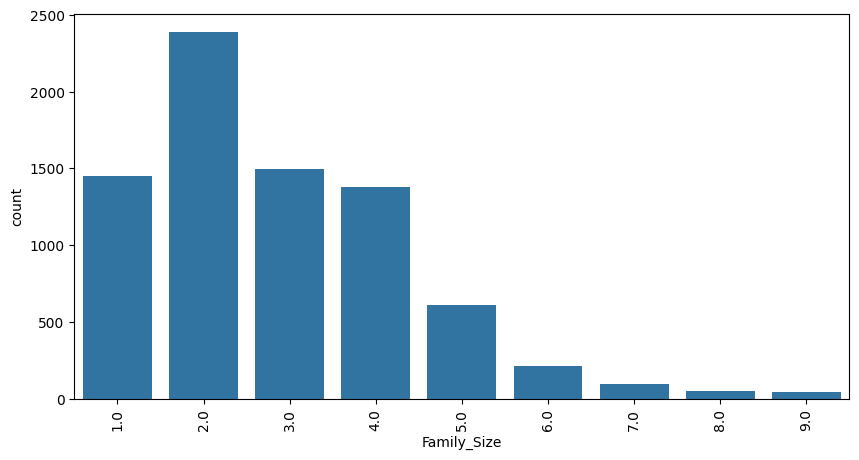

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.countplot(data = train_df_copy, x = "Family_Size")
plt.xticks(rotation = 90)
plt.show()

In [33]:
median = train_df_copy["Family_Size"].median()
median

3.0

In [34]:
median_test = test_df_copy["Family_Size"].median()
median_test

2.0

In [35]:
train_df_copy["Family_Size"].fillna(value=median, inplace=True)

<ipython-input-35-787e278def77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_copy["Family_Size"].fillna(value=median, inplace=True)


In [36]:
test_df_copy["Family_Size"].fillna(value=median_test, inplace=True)

<ipython-input-36-3fb31a74e683>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_copy["Family_Size"].fillna(value=median_test, inplace=True)


In [37]:
display( train_df_copy["Family_Size"].isnull().sum(), test_df_copy["Family_Size"].isnull().sum())

0

0

# 'Work_Experience'

In [38]:
train_df_copy['Work_Experience'].value_counts()

,count
Work_Experience,
1.0,2354
0.0,2318
9.0,474
8.0,463
2.0,286
3.0,255
4.0,253
6.0,204
7.0,196


In [39]:
train_df_copy['Work_Experience'].isnull().sum()

829

In [40]:
display(train_df_copy['Work_Experience'].mean(), train_df_copy['Work_Experience'].mode(), train_df_copy['Work_Experience'].median())

2.641663213150988

,Work_Experience
0,1.0


1.0

In [41]:
median = train_df_copy['Work_Experience'].median()
median

1.0

In [42]:
import plotly.express as px

fig = px.scatter(train_df_copy, x="Age", y="Work_Experience",
                 title="Relationship Between Age and Work Experience",
                 labels={"Age": "Age", "Work_Experience": "Work Experience"})

fig.show()


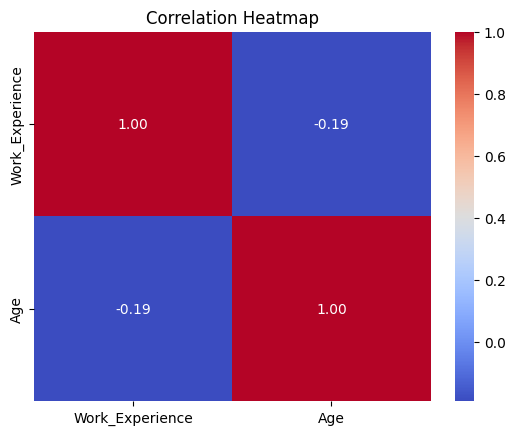

In [43]:
corr_matrix = train_df_copy[['Work_Experience', 'Age']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
train_df_copy['Work_Experience'].value_counts()

,count
Work_Experience,
1.0,2354
0.0,2318
9.0,474
8.0,463
2.0,286
3.0,255
4.0,253
6.0,204
7.0,196


In [45]:
train_df_copy['Work_Experience'] = train_df_copy.groupby('Age')['Work_Experience'].transform(lambda x: x.fillna(x.median()))

In [46]:
test_df_copy['Work_Experience'] = test_df_copy.groupby('Age')['Work_Experience'].transform(lambda x: x.fillna(x.median()))

In [47]:
train_df_copy.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [48]:
test_df_copy.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [49]:
train_df_copy.to_csv("train_df_without_null.csv", index = False)

In [50]:
test_df_copy.to_csv("test_df_without_null.csv", index = False)

# Transform categorical values

In [51]:
import numpy as np

In [52]:
train_df_copy.drop("ID", axis=1, inplace=True)

In [53]:
test_df_copy.drop("ID", axis=1, inplace=True)

In [54]:
train_df_copy.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [55]:
display(train_df_copy['Ever_Married'].value_counts(), train_df_copy['Profession'].value_counts(), train_df_copy['Var_1'].value_counts())

,count
Ever_Married,
Yes,4643
No,3285
Unknown,140


,count
Profession,
Artist,2516
Healthcare,1332
Entertainment,949
Engineer,699
Doctor,688
Lawyer,623
Executive,599
Marketing,292
Homemaker,246


,count
Var_1,
Cat_6,5238
Cat_4,1089
Cat_3,822
Cat_2,422
Cat_7,203
Cat_1,133
Cat_5,85
NA,76


In [56]:
target_col = 'Segmentation'
input_col = list(train_df_copy.columns)[:-1]
df_inputs, df_targets = train_df_copy[input_col], train_df_copy[target_col]
cat_col = df_inputs.select_dtypes(include='object').columns.tolist()
numeric_col = df_inputs.select_dtypes(include=np.number).columns.tolist()

In [57]:
cat_col

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [58]:
gender_type_codes = {'Male': 0, 'Female': 1}
train_df_copy['Gender'] = train_df_copy.Gender.map(gender_type_codes)
test_df_copy['Gender'] = test_df_copy.Gender.map(gender_type_codes)

In [59]:
graduated_type_codes = {'No': 0, 'Yes': 1}
train_df_copy['Graduated'] = train_df_copy.Graduated.map(graduated_type_codes)
test_df_copy['Graduated'] = test_df_copy.Graduated.map(graduated_type_codes)

In [60]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
ordenc.fit(train_df_copy[['Spending_Score']])

train_df_copy['Spending_Score'] = ordenc.transform(train_df_copy[['Spending_Score']])
test_df_copy['Spending_Score'] = ordenc.transform(test_df_copy[['Spending_Score']])

або

In [61]:
train_df_copy.loc[train_df_copy['Spending_Score']=='Low','Spending_Score']=1
train_df_copy.loc[train_df_copy['Spending_Score']=='Average','Spending_Score']=2
train_df_copy.loc[train_df_copy['Spending_Score']=='High','Spending_Score']=3

In [62]:
test_df_copy.loc[test_df_copy['Spending_Score']=='Low','Spending_Score']=1
test_df_copy.loc[test_df_copy['Spending_Score']=='Average','Spending_Score']=2
test_df_copy.loc[test_df_copy['Spending_Score']=='High','Spending_Score']=3

In [63]:
train_df_copy_2 = pd.read_csv("/content/test_df_without_null.csv")

In [83]:
from sklearn.preprocessing import OneHotEncoder

enc= OneHotEncoder(sparse_output=False, handle_unknown='ignore')

enc.fit(train_df_copy[['Ever_Married']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [84]:
enc.categories_[0]

array(['No', 'Unknown', 'Yes'], dtype=object)

In [85]:
encoded_col = enc.get_feature_names_out(['Ever_Married'])
encoded_col

array(['Ever_Married_No', 'Ever_Married_Unknown', 'Ever_Married_Yes'],
      dtype=object)

In [86]:
train_df_copy[encoded_col] = enc.transform(train_df_copy[["Ever_Married"]])
test_df_copy[encoded_col] = enc.transform(test_df_copy[["Ever_Married"]])

In [87]:
train_df_copy[encoded_col]

,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
8063,1.0,0.0,0.0
8064,1.0,0.0,0.0
8065,1.0,0.0,0.0
8066,1.0,0.0,0.0


In [88]:
train_df_copy.drop(columns="Ever_Married", axis=1, inplace=True)
test_df_copy.drop(columns="Ever_Married", axis=1, inplace=True)

In [90]:
train_df_copy

,Gender,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Var_1_NA,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes
0,0,22,0,1.0,0.0,4.0,D,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,38,1,1.0,1.0,3.0,A,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,67,1,1.0,0.0,1.0,B,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,67,1,0.0,2.0,2.0,B,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,40,1,1.0,2.0,6.0,A,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,0,22,0,0.0,0.0,7.0,D,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8064,0,35,0,3.0,0.0,4.0,D,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8065,1,33,1,1.0,0.0,1.0,D,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8066,1,27,1,1.0,0.0,4.0,B,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
enc.fit(train_df_copy[['Profession', 'Var_1']])
encoded_cols = enc.get_feature_names_out(['Profession', 'Var_1'])
encoded_cols

In [67]:
train_df_copy[encoded_cols] = enc.transform(train_df_copy[['Profession', 'Var_1']])
test_df_copy[encoded_cols] = enc.transform(test_df_copy[['Profession', 'Var_1']])

In [68]:
train_df_copy.drop(columns=['Profession', 'Var_1'],axis=1, inplace=True)
test_df_copy.drop(columns=['Profession', 'Var_1'],axis=1, inplace=True)

In [ ]:
train_df_copy[encoded_cols].value_counts()

In [91]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    8068 non-null   int64  
 1   Age                       8068 non-null   int64  
 2   Graduated                 8068 non-null   int64  
 3   Work_Experience           8068 non-null   float64
 4   Spending_Score            8068 non-null   float64
 5   Family_Size               8068 non-null   float64
 6   Segmentation              8068 non-null   object 
 7   Profession_Artist         8068 non-null   float64
 8   Profession_Doctor         8068 non-null   float64
 9   Profession_Engineer       8068 non-null   float64
 10  Profession_Entertainment  8068 non-null   float64
 11  Profession_Executive      8068 non-null   float64
 12  Profession_Healthcare     8068 non-null   float64
 13  Profession_Homemaker      8068 non-null   float64
 14  Professi

In [92]:
train_df_copy.info(), test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    8068 non-null   int64  
 1   Age                       8068 non-null   int64  
 2   Graduated                 8068 non-null   int64  
 3   Work_Experience           8068 non-null   float64
 4   Spending_Score            8068 non-null   float64
 5   Family_Size               8068 non-null   float64
 6   Segmentation              8068 non-null   object 
 7   Profession_Artist         8068 non-null   float64
 8   Profession_Doctor         8068 non-null   float64
 9   Profession_Engineer       8068 non-null   float64
 10  Profession_Entertainment  8068 non-null   float64
 11  Profession_Executive      8068 non-null   float64
 12  Profession_Healthcare     8068 non-null   float64
 13  Profession_Homemaker      8068 non-null   float64
 14  Professi

(None, None)

In [93]:
train_df_copy['Segmentation'].value_counts()

,count
Segmentation,
D,2268
A,1972
C,1970
B,1858


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_labels = le.fit(train_df_copy['Segmentation'])
print(encoded_labels)

LabelEncoder()


In [95]:
train_df_copy['Segmentation'] = le.transform(train_df_copy[['Segmentation']])


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [96]:
train_df_copy['Segmentation'].value_counts()

,count
Segmentation,
3,2268
0,1972
2,1970
1,1858


In [97]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    8068 non-null   int64  
 1   Age                       8068 non-null   int64  
 2   Graduated                 8068 non-null   int64  
 3   Work_Experience           8068 non-null   float64
 4   Spending_Score            8068 non-null   float64
 5   Family_Size               8068 non-null   float64
 6   Segmentation              8068 non-null   int64  
 7   Profession_Artist         8068 non-null   float64
 8   Profession_Doctor         8068 non-null   float64
 9   Profession_Engineer       8068 non-null   float64
 10  Profession_Entertainment  8068 non-null   float64
 11  Profession_Executive      8068 non-null   float64
 12  Profession_Healthcare     8068 non-null   float64
 13  Profession_Homemaker      8068 non-null   float64
 14  Professi

Download visualization by Sweetviz

In [98]:
import sweetviz as sv

feature_config = sv.FeatureConfig(force_num=["Segmentation"])
my_report = sv.analyze(train_df_copy, target_feat='Segmentation', feat_cfg=feature_config)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **Split dataset**

In [139]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df_copy, test_size=0.2, random_state=42, stratify=train_df_copy[target_col])

In [140]:
train_df.shape, val_df.shape

((6454, 28), (1614, 28))

In [141]:
train_df.columns

Index(['Gender', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score',
       'Family_Size', 'Segmentation', 'Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_Other',
       'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7', 'Var_1_NA',
       'Ever_Married_No', 'Ever_Married_Unknown', 'Ever_Married_Yes'],
      dtype='object')

In [142]:
target_col = 'Segmentation'
train_inputs = train_df.drop(columns=['Segmentation'])
train_targets = train_df[target_col]
val_inputs = val_df.drop(columns=['Segmentation'])
val_targets = val_df[target_col]

Saved in parquet and csv

In [143]:
train_inputs.to_parquet('train_inputs.parquet')
train_target.to_csv('train_targets.csv',index=False)
val_inputs.to_parquet('val_inputs.parquet')
val_targets.to_csv('val_targets.csv', index=False)

**Завдання 2. Важливо уважно прочитати все формулювання цього завдання до кінця!**

Застосуйте методи ресемплингу даних SMOTE та SMOTE-Tomek з бібліотеки imbalanced-learn до тренувальної вибірки. В результаті у Вас має вийти 2 тренувальних набори: з апсемплингом зі SMOTE, та з ресамплингом з SMOTE-Tomek.

Увага! В нашому наборі даних є як категоріальні дані, так і звичайні числові. Базовий SMOTE не буде правильно працювати з категоріальними даними, але є його модифікація, яка буде. Тому в цього завдання є 2 виконання

  1. Застосувати SMOTE базовий лише на НЕкатегоріальних ознаках.

  2. Переглянути інформацію про метод [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) і використати цей метод в цій задачі. За цей спосіб буде +3 бали за це завдання і він рекомендований для виконання.

  **Підказка**: аби скористатись SMOTENC треба створити змінну, яка містить індекси ознак, які є категоріальними (їх номер серед колонок) і передати при ініціації екземпляра класу `SMOTENC(..., categorical_features=cat_feature_indeces)`.
  
  Ви також можете розглянути варіант використання варіації SMOTE, який працює ЛИШЕ з категоріальними ознаками [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)

In [104]:
!pip install -U imbalanced-learn

In [144]:
train_df

,Gender,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Var_1_NA,Ever_Married_No,Ever_Married_Unknown,Ever_Married_Yes
917,1,32,1,9.0,0.0,1.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3398,0,72,1,1.0,1.0,2.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2045,1,33,1,1.0,0.0,4.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8060,1,48,1,0.0,1.0,6.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4604,1,28,0,9.0,0.0,1.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,1,27,0,8.0,0.0,1.0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5864,0,37,1,0.0,0.0,2.0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3589,1,27,0,6.0,0.0,6.0,3,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1489,0,26,0,0.0,0.0,2.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [146]:
target = 'Segmentation'
cat_col

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [147]:
cat_cols = ['Gender', 'Graduated', 'Spending_Score','Profession_Artist', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_Other',
       'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4',
       'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7', 'Var_1_NA',
       'Ever_Married_No', 'Ever_Married_Unknown', 'Ever_Married_Yes']
cat_cols

['Gender',
 'Graduated',
 'Spending_Score',
 'Profession_Artist',
 'Profession_Doctor',
 'Profession_Engineer',
 'Profession_Entertainment',
 'Profession_Executive',
 'Profession_Healthcare',
 'Profession_Homemaker',
 'Profession_Lawyer',
 'Profession_Marketing',
 'Profession_Other',
 'Var_1_Cat_1',
 'Var_1_Cat_2',
 'Var_1_Cat_3',
 'Var_1_Cat_4',
 'Var_1_Cat_5',
 'Var_1_Cat_6',
 'Var_1_Cat_7',
 'Var_1_NA',
 'Ever_Married_No',
 'Ever_Married_Unknown',
 'Ever_Married_Yes']

In [149]:
train_inputs.columns.get_loc('Graduated')

2

**SMOTENC**

In [150]:
from imblearn.over_sampling import SMOTENC

cat_feature_indeces = [train_inputs.columns.get_loc(col) for col in cat_cols]

smotenc = SMOTENC(categorical_features=cat_feature_indeces, random_state=42)
train_inputs_smotenc, train_targets_smotenc = smotenc.fit_resample(train_inputs, train_targets)

In [151]:
print("Розмір оригінальних даних:", train_inputs.shape)
print("Розмір після ресемплінгу SMOTENC:", train_inputs_smotenc.shape)

Розмір оригінальних даних: (6454, 27)
Розмір після ресемплінгу SMOTENC: (7256, 27)


In [157]:
print("Size target after STOMENC")
display(train_targets_smotenc.value_counts())
print("\nSize target before STOMENC")
display(train_targets.value_counts())

Size target after STOMENC


,count
Segmentation,
0,1814
1,1814
2,1814
3,1814



Size target before STOMENC


,count
Segmentation,
3,1814
0,1578
2,1576
1,1486


**SMOTETomek**

In [158]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(random_state=42)
train_inputs_smotetomek, train_targets_smotetomek = smotetomek.fit_resample(train_inputs, train_targets)

In [159]:
print("Size target after SMOTETomek")
display(train_targets_smotetomek.value_counts())
print("\nSize target before SMOTETomek")
display(train_targets.value_counts())

Size target after SMOTETomek


,count
Segmentation,
2,1643
1,1637
3,1623
0,1583



Size target before SMOTETomek


,count
Segmentation,
3,1814
0,1578
2,1576
1,1486


**Завдання 3**.
  1. Навчіть модель логістичної регресії з використанням стратегії One-vs-Rest з логістичною регресією на оригінальних даних, збалансованих з SMOTE, збалансованих з Smote-Tomek.  
  2. Виміряйте якість кожної з натренованих моделей використовуючи `sklearn.metrics.classification_report`.
  3. Напишіть, яку метрику ви обрали для порівняння моделей.
  4. Яка модель найкраща?
  5. Якщо немає суттєвої різниці між моделями - напишіть свою гіпотезу, чому?

In [187]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score

def fit_pred_model(X, y, X_val, y_val, name=""):
  log_reg = LogisticRegression(solver="liblinear")
  ovr_cls = OneVsRestClassifier(log_reg)
  model = ovr_cls.fit(X,y)
  preds = model.predict(X_val)
  micro_precision = precision_score(val_targets, preds, average='micro')
  print(f"{name} micro precision_score: \n{micro_precision:.3f}\n\n")
  print(f"{name} \n {classification_report(y_val, preds) }")
  return preds



In [188]:
origin_ = fit_pred_model(X=train_inputs, y=train_targets, X_val=val_inputs, y_val=val_targets, name="Origin dataset")

Origin dataset micro precision_score: 
0.518


Origin dataset 
               precision    recall  f1-score   support

           0       0.42      0.45      0.44       394
           1       0.43      0.16      0.23       372
           2       0.49      0.64      0.56       394
           3       0.65      0.76      0.70       454

    accuracy                           0.52      1614
   macro avg       0.50      0.50      0.48      1614
weighted avg       0.50      0.52      0.49      1614



In [189]:
smotenc_ = fit_pred_model(X=train_inputs_smotenc, y=train_targets_smotenc, X_val=val_inputs, y_val=val_targets, name="SMOTENC dataset")

SMOTENC dataset micro precision_score: 
0.514


SMOTENC dataset 
               precision    recall  f1-score   support

           0       0.41      0.46      0.43       394
           1       0.41      0.22      0.28       372
           2       0.50      0.62      0.55       394
           3       0.66      0.72      0.69       454

    accuracy                           0.51      1614
   macro avg       0.50      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614



In [190]:
smotetomek_ = fit_pred_model(X=train_inputs_smotetomek, y=train_targets_smotetomek, X_val=val_inputs, y_val=val_targets, name="SMOTETomek")

SMOTETomek micro precision_score: 
0.510


SMOTETomek 
               precision    recall  f1-score   support

           0       0.40      0.45      0.43       394
           1       0.39      0.22      0.28       372
           2       0.49      0.63      0.55       394
           3       0.68      0.70      0.69       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.49      1614
weighted avg       0.50      0.51      0.50      1614



**Висновок**

Я обрала метрику *f1* та *macro avg* для порівняння моделей

На мій погляд модель з SMOTENC найкраще передбачає серед інших.

Суттєвої різниці між моделями немає навіть якщо маштабувати ознаки, можливо данні не достатньо підготовлені чи мала кількість фічей або треба використовувати інші моделі

In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']
train_inputs[cols_to_scale] = scaler.fit_transform(train_inputs[cols_to_scale])
val_inputs[cols_to_scale] = scaler.fit_transform(val_inputs[cols_to_scale])

In [196]:
scal_ = fit_pred_model(X=train_inputs, y=train_targets, X_val=val_inputs, y_val=val_targets, name="Scalable dataset")

Scalable dataset micro precision_score: 
0.517


Scalable dataset 
               precision    recall  f1-score   support

           0       0.42      0.46      0.44       394
           1       0.43      0.15      0.23       372
           2       0.49      0.64      0.55       394
           3       0.65      0.76      0.70       454

    accuracy                           0.52      1614
   macro avg       0.50      0.50      0.48      1614
weighted avg       0.50      0.52      0.49      1614

